# **Universidad Central**

![UC](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)

# **Maestría en Analítica de Datos**
## *Fundamentos De Estadística Para La Analítica de Datos*
## **Profesor**: Nelson Alirio Cruz Gutierrez Ph.D.
## **Estudiantes**:
## -- Cristian Camilo Guevara Serrano
## -- Jennifer Alexandra Rodríguez Crespo 
## -- Stiven Leonardo Silva Castillo


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

In [2]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Diabetes.csv"
Diabetes = pd.read_csv(url, sep=";")
Diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


$Y = class$ es la variable binaria que indica si una persona tiene o no diabetes (0 o 1)

$X$ = Las variables explicativas

In [3]:
Y = Diabetes["class"] ## Selecciono a Y
Y = label_binarize(Y, classes=[ "Negative","Positive"]) 
X = Diabetes[['Age', "Gender", "Polyuria"]] ## Selecciono las X
X. columns

Index(['Age', 'Gender', 'Polyuria'], dtype='object')

In [4]:
# Variables Dummy
X= pd.get_dummies(X, drop_first=True)

In [5]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test=train_test_split(X, Y,random_state=123, test_size=0.2, stratify=Y) # Muestreo aleatorio simple

In [6]:
# Regresion Logistica
logreg=LogisticRegression(C=1)

In [7]:
# Entrenamiento del modelo
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1)

In [8]:
print("Intercepto", logreg.intercept_)

# Extracción de los parámetros
print("Beta",pd.DataFrame(np.transpose(logreg.coef_), index=X_train.columns, columns=["betas"])) 

Intercepto [0.57352395]
Beta                  betas
Age           0.004551
Gender_Male  -2.387198
Polyuria_Yes  3.649191


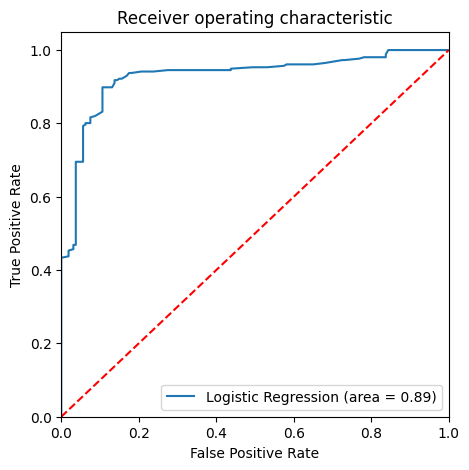

In [9]:
# Área bajo la curva
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))

# FPR: False positive rate
# TPR: True positive rate
# Thresholds: Umbrales
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Tarea**

La distancia al punto perfecto, $(0,1)$ = ($0\%$ FP, $100\%$ TP) está dada por:

$$distancia =\sqrt{FPR^2+(1-TPR)^2}=\sqrt{FPR^2+FNR^2}$$

El mejor umbral es aquel que hace que la suma al cuadrado de la tasa de falsos positivos más la tasa de falsos negativos sea más chiquita.

In [10]:
umbral = pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
umbral["Distancia"] = np.sqrt(umbral["FPR"]**2 + (1 - umbral["TPR"])**2)
umbral.sort_values("Distancia")

,FPR,TPR,Umbral,Distancia
63,0.1062,0.8984,0.6754,0.146973
62,0.1062,0.8867,0.6784,0.155291
66,0.1375,0.9180,0.1894,0.160095
61,0.1062,0.8789,0.6853,0.161070
65,0.1375,0.9102,0.6684,0.164226
...,...,...,...,...
2,0.0000,0.0430,0.9894,0.957000
1,0.0000,0.0156,0.9894,0.984400
101,0.9938,1.0000,0.1557,0.993800
0,0.0000,0.0000,1.9894,1.000000


El mejor umbral esta en el punto FPR (0.1062) TRP (0.8984) con una Distancia de (0.146973)